<a href="https://colab.research.google.com/github/bhavesh-choudhary1/machine_learning_concept/blob/main/StandardizationFeatureScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
396,15706071,Male,51,23000,1
385,15775335,Male,56,60000,1
336,15664907,Male,58,144000,1
159,15598840,Female,32,135000,1
121,15741049,Male,37,72000,0


In [ ]:
df = df.iloc[ : , 2: ]

In [ ]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'], test_size=0.3,random_state=0)

In [ ]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [ ]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [ ]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [ ]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [ ]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of **Scaling**

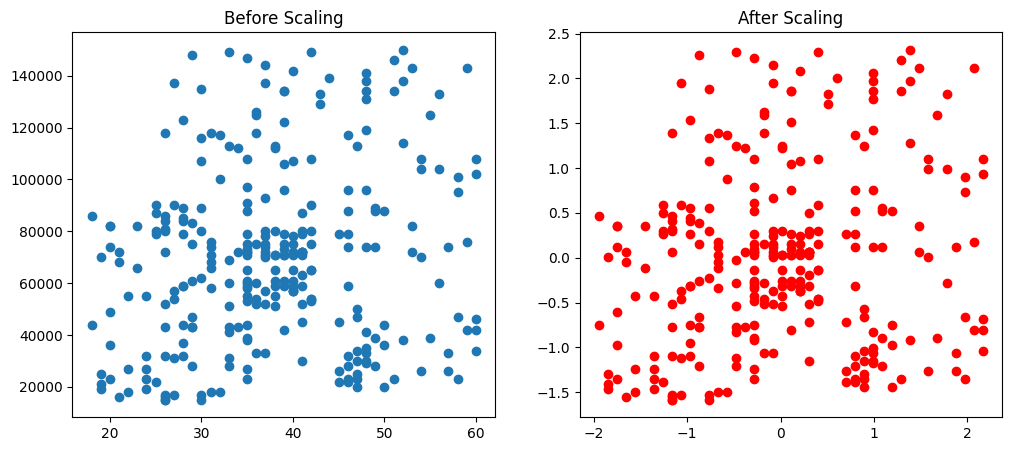

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols =2 , figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

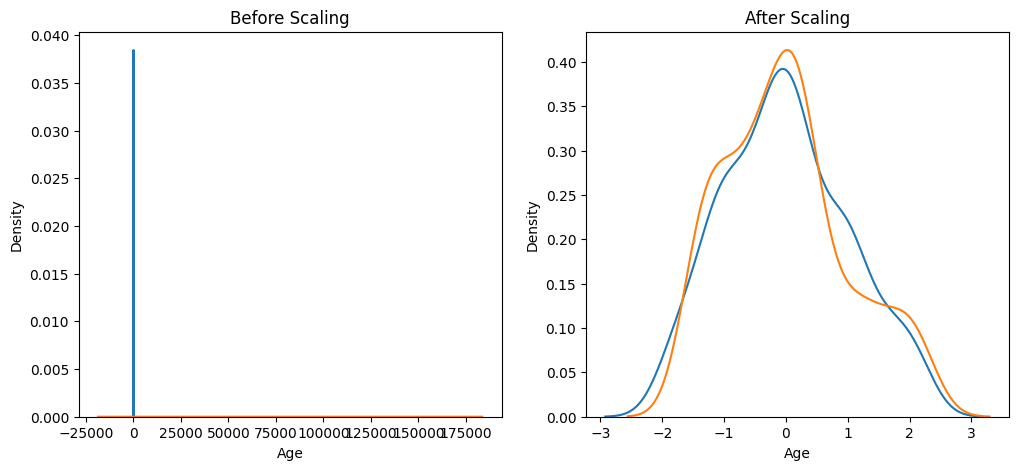

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols =2 , figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

<Axes: title={'center': 'Age distribution after scaling'}, xlabel='Age', ylabel='Density'>

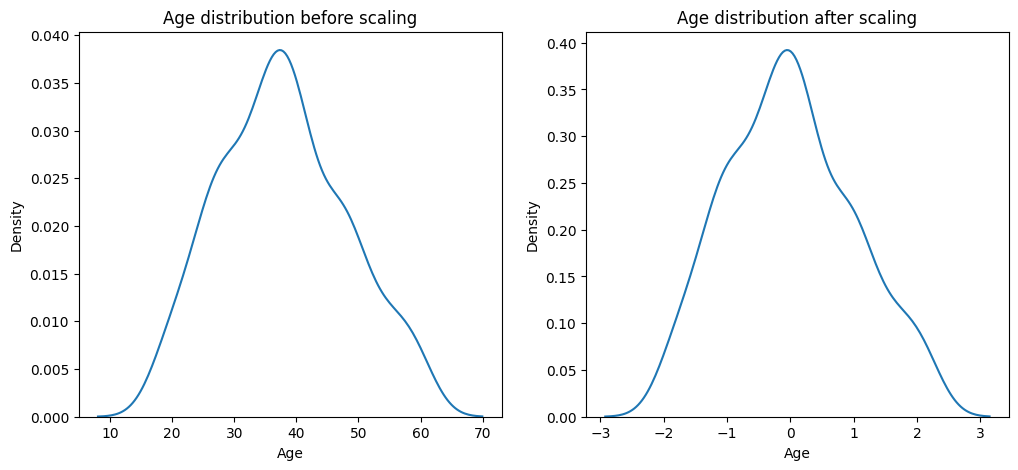

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize=(12,5))
#before scaling
ax1.set_title('Age distribution before scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

#after Scaling
ax2.set_title('Age distribution after scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

<Axes: title={'center': 'EstimatedSalary distribution after scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

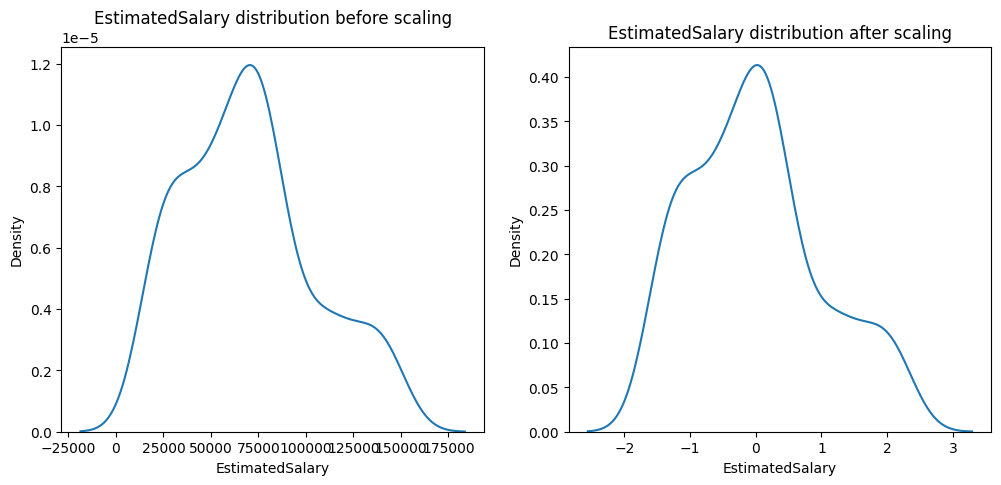

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize=(12,5))
#before scaling
ax1.set_title('EstimatedSalary distribution before scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#after Scaling
ax2.set_title('EstimatedSalary distribution after scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)